In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Extração de datasets
df = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_%C3%8Dndice_de_Desenvolvimento_Humano')

In [3]:
len(df)

16

In [4]:
idh = df[4]
idh
#Podemos notar que existe um erro em como essas colunas estão organizadas, devemos reparar isso.

Posição                                                      País  \
              2021 Variação em relação a 2020[16]                       País   
    IDH Muito Alto                 IDH Muito Alto             IDH Muito Alto   
0                1                              1                      Suíça   
1                2                              1                    Noruega   
2                3                              1                   Islândia   
3                4                            NaN                  Hong Kong   
4                5                              3                  Austrália   
..             ...                            ...                        ...   
189            187                            NaN                    Burundi   
190            188                            NaN  República Centro-Africana   
191            189                            NaN                      Níger   
192            190                              3                      Chade   
193            191                              6               Sudão do Sul   

    Índice de Desenvolvimento Humano                                            
                        IDH 2021[16]       IDH 2020 Variação em relação a 2020  
                      IDH Muito Alto IDH Muito Alto             IDH Muito Alto  
0                               0962           0956                       0006  
1                               0961           0959                       0002  
2                               0959           0957                       0002  
3                               0952           0949                       0003  
4                               0951           0947                       0004  
..                               ...            ...                        ...  
189                             0426           0426                       0000  
190                             0404           0407                       0003  
191                             0400           0401                       0001  
192                             0394           0397                       0003  
193                             0385           0386                       0001  

[194 rows x 6 columns]

In [5]:
idh.columns = idh.columns.get_level_values(0)
idh

,Posição,Posição,País,Índice de Desenvolvimento Humano,Índice de Desenvolvimento Humano,Índice de Desenvolvimento Humano
0,1,1,Suíça,0962,0956,0006
1,2,1,Noruega,0961,0959,0002
2,3,1,Islândia,0959,0957,0002
3,4,NaN,Hong Kong,0952,0949,0003
4,5,3,Austrália,0951,0947,0004
...,...,...,...,...,...,...
189,187,NaN,Burundi,0426,0426,0000
190,188,NaN,República Centro-Africana,0404,0407,0003
191,189,NaN,Níger,0400,0401,0001
192,190,3,Chade,0394,0397,0003


In [6]:
#Renomeando as colunas
idh.columns.values[1] = 'Posição_drop'
idh.columns.values[3] = 'IDH 2021'
idh.columns.values[4] = 'IDH 2020'
idh.columns.values[5] = 'Variação_drop'
idh.head()

,Posição,Posição_drop,País,IDH 2021,IDH 2020,Variação_drop
0,1,1,Suíça,0962,0956,0006
1,2,1,Noruega,0961,0959,0002
2,3,1,Islândia,0959,0957,0002
3,4,NaN,Hong Kong,0952,0949,0003
4,5,3,Austrália,0951,0947,0004


In [7]:
#Dropando colunas desnecessárias
idh.drop(columns=['Posição_drop', 'Variação_drop'], inplace=True)
idh.head()

,Posição,País,IDH 2021,IDH 2020
0,1,Suíça,0962,0956
1,2,Noruega,0961,0959
2,3,Islândia,0959,0957
3,4,Hong Kong,0952,0949
4,5,Austrália,0951,0947


In [8]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Posição   194 non-null    object
 1   País      194 non-null    object
 2   IDH 2021  194 non-null    object
 3   IDH 2020  194 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [9]:
#df.drop(df[df['nome_coluna'] == 'valor_especifico'].index, inplace=True)
idh.drop(idh[idh['Posição']=='IDH Alto'].index, inplace=True)
idh.drop(idh[idh['Posição']=='IDH Médio'].index, inplace=True)
idh.drop(idh[idh['Posição']=='IDH Baixo'].index, inplace=True)

In [10]:
#df['nome_coluna'] = df['nome_coluna'].astype(int)
idh['IDH 2021'] = idh['IDH 2021'].astype(float)
idh['IDH 2020'] = idh['IDH 2020'].astype(float)

idh['IDH 2021'] = idh['IDH 2021']/1000
idh['IDH 2020'] = idh['IDH 2020']/1000
idh['Variação de IDH'] = idh['IDH 2021']-idh['IDH 2020']

In [11]:
idh

,Posição,País,IDH 2021,IDH 2020,Variação de IDH
0,1,Suíça,0.962,0.956,0.006
1,2,Noruega,0.961,0.959,0.002
2,3,Islândia,0.959,0.957,0.002
3,4,Hong Kong,0.952,0.949,0.003
4,5,Austrália,0.951,0.947,0.004
...,...,...,...,...,...
189,187,Burundi,0.426,0.426,0.000
190,188,República Centro-Africana,0.404,0.407,-0.003
191,189,Níger,0.400,0.401,-0.001
192,190,Chade,0.394,0.397,-0.003


In [12]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 193
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Posição          191 non-null    object 
 1   País             191 non-null    object 
 2   IDH 2021         191 non-null    float64
 3   IDH 2020         191 non-null    float64
 4   Variação de IDH  191 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.0+ KB


In [13]:
def classifica_idh(valor):
    if valor < 0.5:
        return 'baixo'
    elif valor >= 0.5 and valor < 0.800:
        return 'médio'
    elif valor >=0.800 and valor < 0.900:
        return 'alto'
    else:
        return 'muito alto'

In [14]:
idh['Classificação'] = idh['IDH 2021'].apply(classifica_idh)

In [15]:
idh

,Posição,País,IDH 2021,IDH 2020,Variação de IDH,Classificação
0,1,Suíça,0.962,0.956,0.006,muito alto
1,2,Noruega,0.961,0.959,0.002,muito alto
2,3,Islândia,0.959,0.957,0.002,muito alto
3,4,Hong Kong,0.952,0.949,0.003,muito alto
4,5,Austrália,0.951,0.947,0.004,muito alto
...,...,...,...,...,...,...
189,187,Burundi,0.426,0.426,0.000,baixo
190,188,República Centro-Africana,0.404,0.407,-0.003,baixo
191,189,Níger,0.400,0.401,-0.001,baixo
192,190,Chade,0.394,0.397,-0.003,baixo


Text(0.0, 1.0, "Análise dos IDH's")

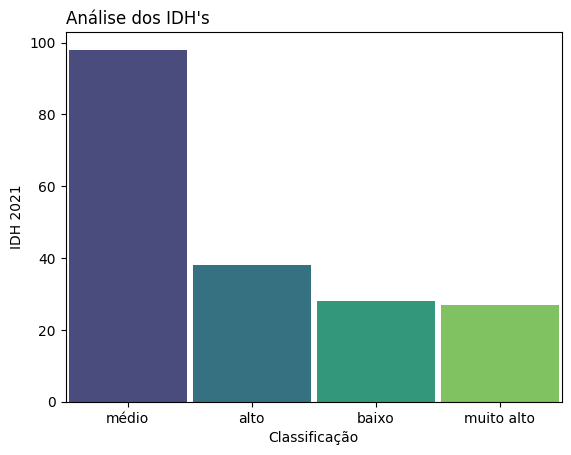

In [16]:
classi = idh.groupby('Classificação').count().sort_values(by='Posição', ascending=False)
sns.barplot(data=classi, x=classi.index, y='IDH 2021', width=0.95, palette='viridis')
plt.title("Análise dos IDH's", loc='left')

Text(0.0, 1.0, "Análise dos IDH's")

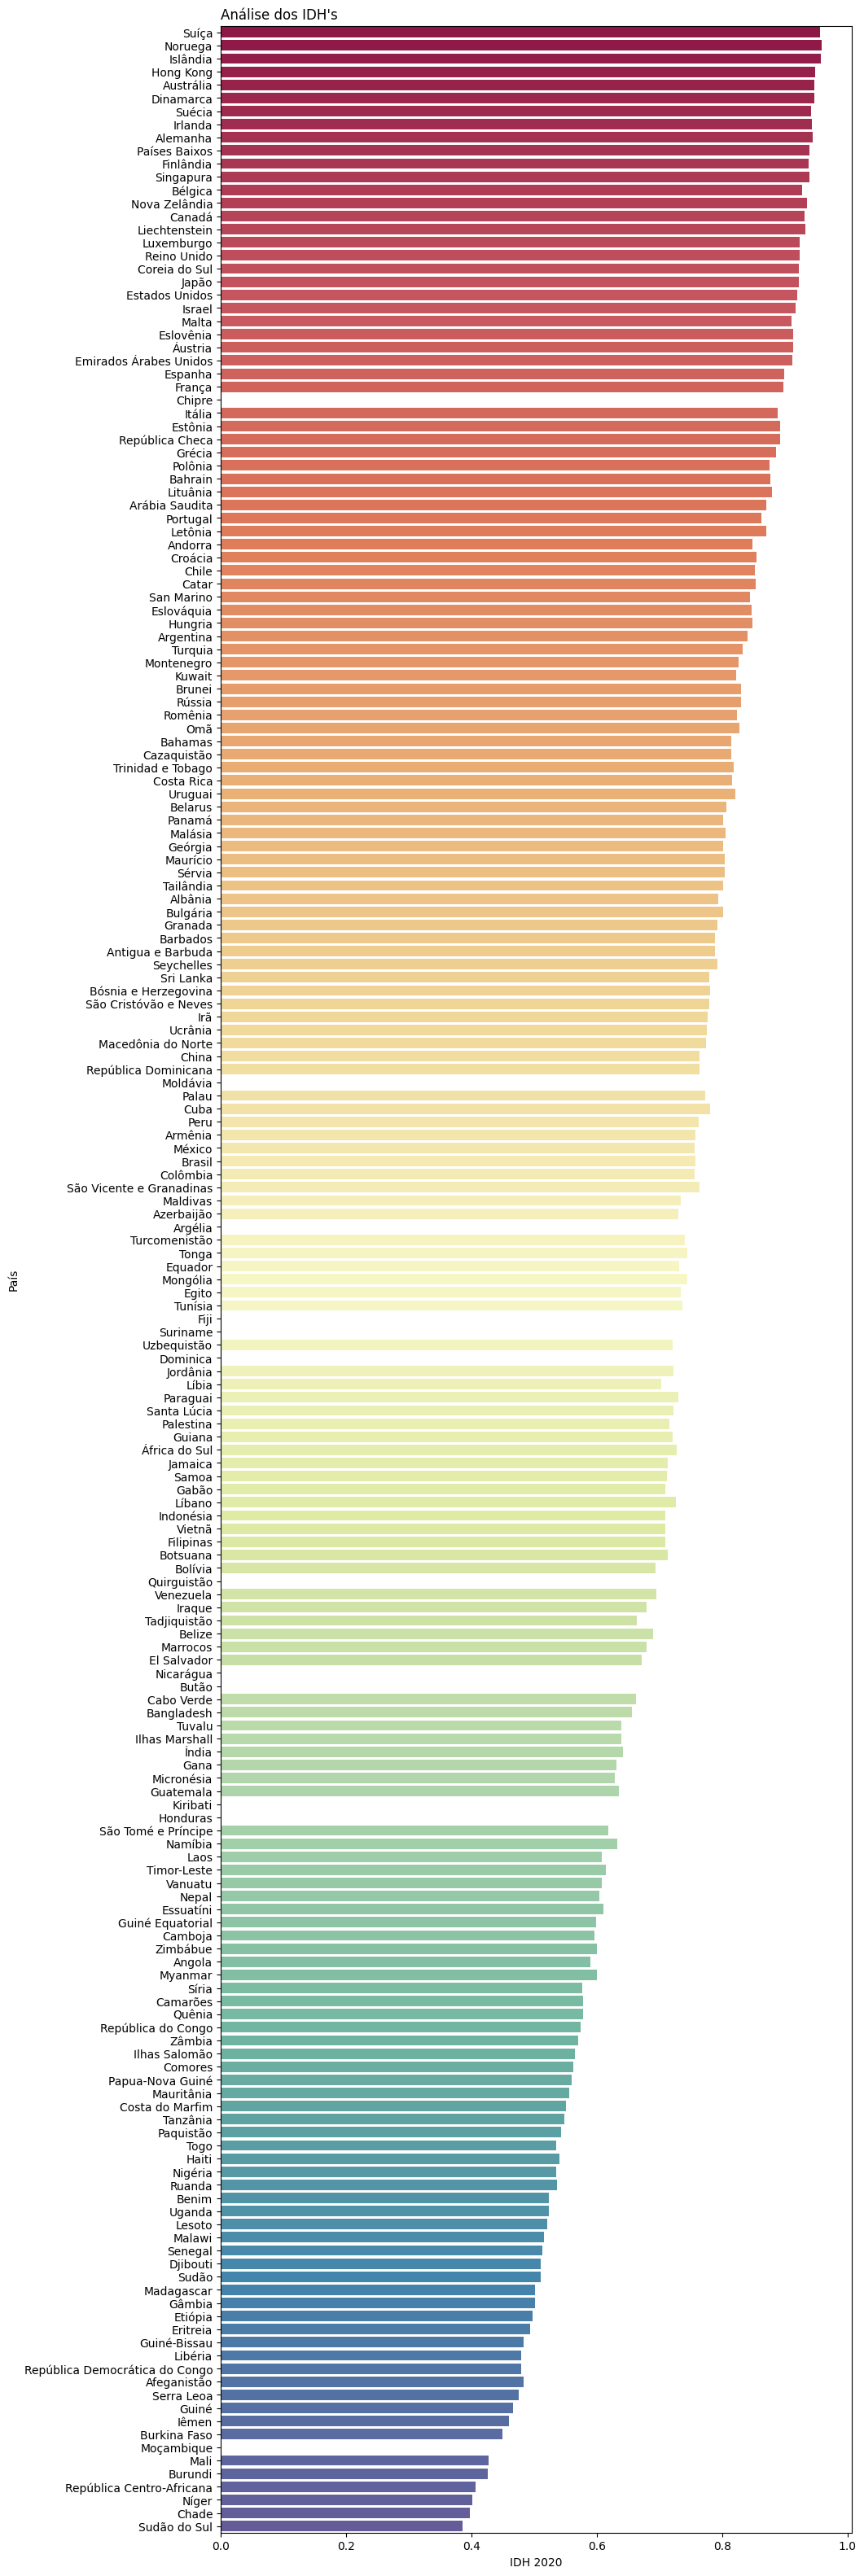

In [17]:
#Através desse plot foi possível notar que alguns dados estão anômalos e iremos buscar entender o que está acontecendo
plt.figure(figsize=(10,40))
sns.barplot(data=idh, x='IDH 2020', y='País', orient='h', width=0.8, palette='Spectral')
plt.title("Análise dos IDH's", loc='left')

In [18]:
#Graças ao gráfico anterior podemos notar que alguns dados estão estranhos, devemos buscar entender o que está acontecendo.
idh[180:190]
#Ali está, Moçambique está com um valor muito pequeno.
#Também poderíamos ter feito uma consulta query nesse momento mas achei este método mais simples

,Posição,País,IDH 2021,IDH 2020,Variação de IDH,Classificação
183,181,Serra Leoa,0.477000,0.475000,0.002000,baixo
184,182,Guiné,0.465000,0.466000,-0.001000,baixo
185,183,Iêmen,0.455000,0.460000,-0.005000,baixo
186,184,Burkina Faso,0.449000,0.449000,0.000000,baixo
187,185,Moçambique,0.000446,0.000453,-0.000007,baixo
188,186,Mali,0.428000,0.427000,0.001000,baixo
189,187,Burundi,0.426000,0.426000,0.000000,baixo
190,188,República Centro-Africana,0.404000,0.407000,-0.003000,baixo
191,189,Níger,0.400000,0.401000,-0.001000,baixo
192,190,Chade,0.394000,0.397000,-0.003000,baixo


In [19]:
#Por exemplo:
idh.query("País == 'Honduras'")

,Posição,País,IDH 2021,IDH 2020,Variação de IDH,Classificação
138,137,Honduras,0.000621,0.000621,0.0,baixo


In [20]:
#Essa função irá identificar o valores menores que 0,1 e irá multiplicá-los por 1000 para padronizar os dados anômolos
def multiplica_anomalia(valor):
    if valor < 0.1:
        return valor*1000
    else:
        return valor

idh['IDH 2021'] = idh['IDH 2021'].apply(multiplica_anomalia)
idh['IDH 2020'] = idh['IDH 2020'].apply(multiplica_anomalia)

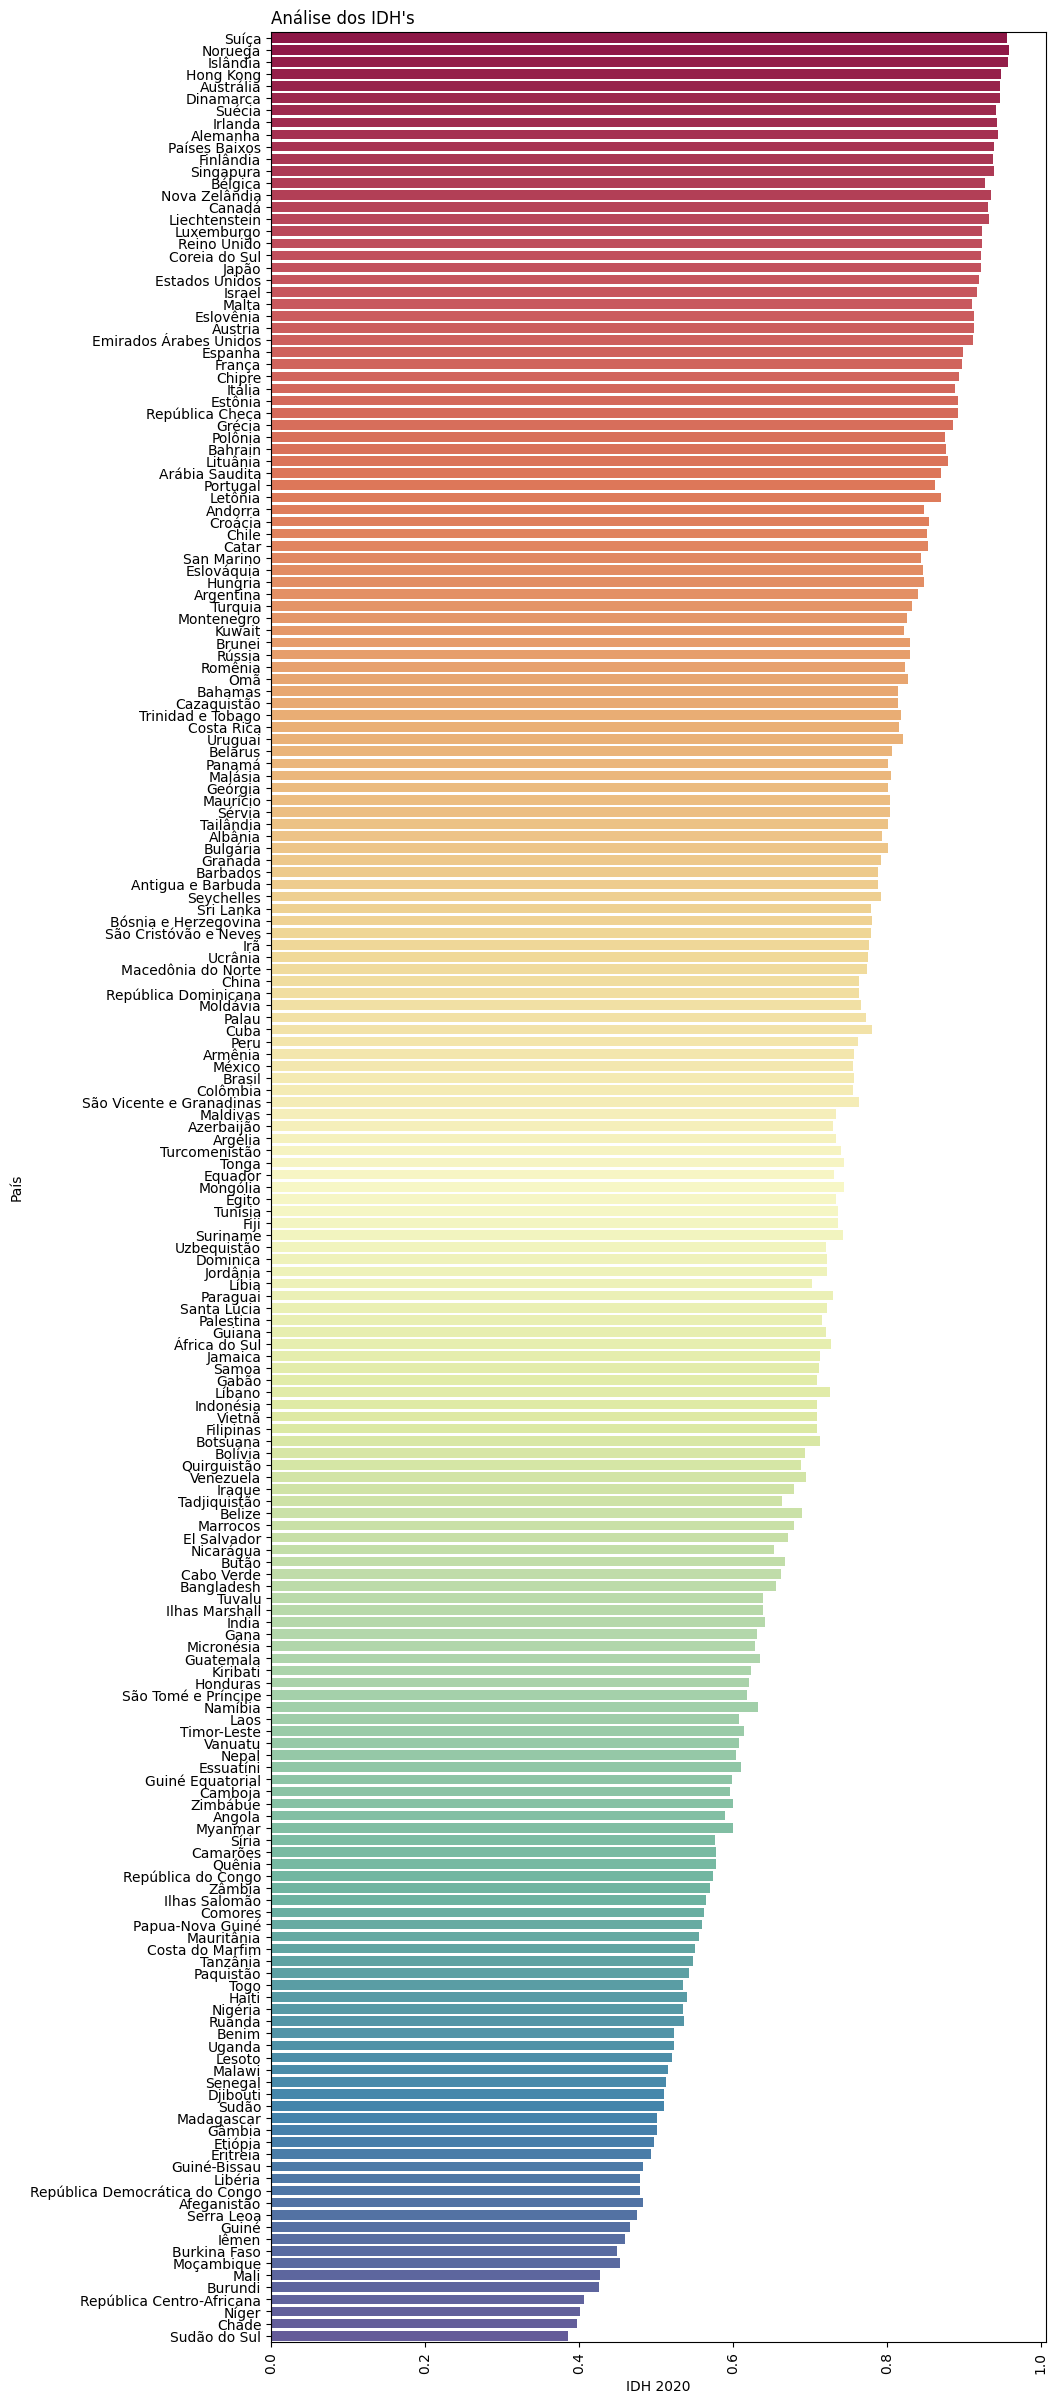

In [21]:
plt.figure(figsize=(10,30))
sns.barplot(data=idh, x='IDH 2020', y='País', width=0.8, palette='Spectral')
plt.xticks(rotation = 90);
plt.title("Análise dos IDH's", loc='left')
plt.show()

In [22]:
classi.sort_values(by='Posição', ascending=False)

,Posição,País,IDH 2021,IDH 2020,Variação de IDH
Classificação,,,,,
médio,98,98,98,98,98
alto,38,38,38,38,38
baixo,28,28,28,28,28
muito alto,27,27,27,27,27


In [23]:
to_plot = idh.head(10)

In [25]:
from geopy.geocoders import Nominatim

def get_coordinates(country):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(country)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

idh["coordenadas"] = idh["País"].apply(get_coordinates)

In [26]:
idh

,Posição,País,IDH 2021,IDH 2020,Variação de IDH,Classificação,coordenadas
0,1,Suíça,0.962,0.956,0.006,muito alto,"(46.7985624, 8.2319736)"
1,2,Noruega,0.961,0.959,0.002,muito alto,"(61.1529386, 8.7876653)"
2,3,Islândia,0.959,0.957,0.002,muito alto,"(64.9841821, -18.1059013)"
3,4,Hong Kong,0.952,0.949,0.003,muito alto,"(22.2793278, 114.1628131)"
4,5,Austrália,0.951,0.947,0.004,muito alto,"(-24.7761086, 134.755)"
...,...,...,...,...,...,...,...
189,187,Burundi,0.426,0.426,0.000,baixo,"(-3.426449, 29.9324519)"
190,188,República Centro-Africana,0.404,0.407,-0.003,baixo,"(7.0323598, 19.9981227)"
191,189,Níger,0.400,0.401,-0.001,baixo,"(17.7356214, 9.3238432)"
192,190,Chade,0.394,0.397,-0.003,baixo,"(15.6134137, 19.0156172)"


In [27]:
idh['coordenadas'] = idh['coordenadas'].astype('string')
idh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 193
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Posição          191 non-null    object 
 1   País             191 non-null    object 
 2   IDH 2021         191 non-null    float64
 3   IDH 2020         191 non-null    float64
 4   Variação de IDH  191 non-null    float64
 5   Classificação    191 non-null    object 
 6   coordenadas      191 non-null    string 
dtypes: float64(3), object(3), string(1)
memory usage: 11.9+ KB


In [28]:
import warnings
warnings.filterwarnings('ignore')
idh[['latitude', 'longitude']] = idh['coordenadas'].str.replace('(','').str.replace(')','').str.split(',', expand=True) 
idh

,Posição,País,IDH 2021,IDH 2020,Variação de IDH,Classificação,coordenadas,latitude,longitude
0,1,Suíça,0.962,0.956,0.006,muito alto,"(46.7985624, 8.2319736)",46.7985624,8.2319736
1,2,Noruega,0.961,0.959,0.002,muito alto,"(61.1529386, 8.7876653)",61.1529386,8.7876653
2,3,Islândia,0.959,0.957,0.002,muito alto,"(64.9841821, -18.1059013)",64.9841821,-18.1059013
3,4,Hong Kong,0.952,0.949,0.003,muito alto,"(22.2793278, 114.1628131)",22.2793278,114.1628131
4,5,Austrália,0.951,0.947,0.004,muito alto,"(-24.7761086, 134.755)",-24.7761086,134.755
...,...,...,...,...,...,...,...,...,...
189,187,Burundi,0.426,0.426,0.000,baixo,"(-3.426449, 29.9324519)",-3.426449,29.9324519
190,188,República Centro-Africana,0.404,0.407,-0.003,baixo,"(7.0323598, 19.9981227)",7.0323598,19.9981227
191,189,Níger,0.400,0.401,-0.001,baixo,"(17.7356214, 9.3238432)",17.7356214,9.3238432
192,190,Chade,0.394,0.397,-0.003,baixo,"(15.6134137, 19.0156172)",15.6134137,19.0156172


In [29]:
import folium

In [30]:
m = folium.Map()

for i, row in idh.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"País: {row['País']}<br>IDH: {row['IDH 2021']}<br> Variação 2021-2020: {row['Variação de IDH']}<br> Classificação: {row['Classificação']}<br>").add_to(m)
    
m
